<a href="https://colab.research.google.com/github/aishananaraji/arbitrary/blob/main/Fuji_descent_issue2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

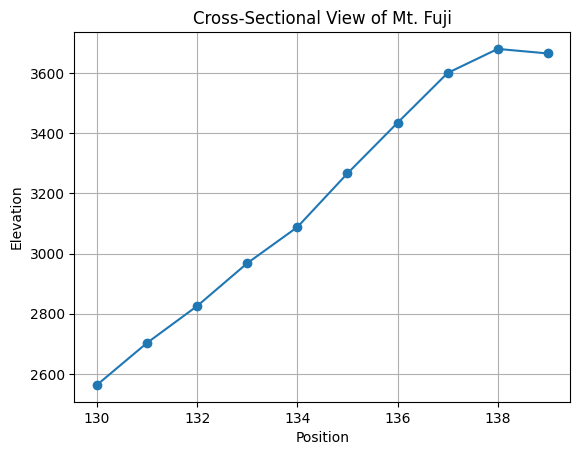

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data using NumPy
csv_path = "/content/drive/MyDrive/mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Define the range for the cross-sectional view (e.g., from index 130 to 140)
start_index = 130
end_index = 140

# Extract the relevant data for plotting
position = fuji[start_index:end_index, 0]
elevation = fuji[start_index:end_index, 3]

# Plot the cross-sectional view
plt.plot(position, elevation, marker='o')  # Line plot with markers
plt.xlabel("Position")
plt.ylabel("Elevation")
plt.title("Cross-Sectional View of Mt. Fuji")
plt.grid(True)  # Add grid lines for better readability
plt.show()


In [ ]:
print(fuji[130:140])

[[1.30000000e+02 3.53525050e+01 1.38756638e+02 2.56340000e+03
  4.18880000e+04]
 [1.31000000e+02 3.53541800e+01 1.38753742e+02 2.70310000e+03
  4.22100000e+04]
 [1.32000000e+02 3.53558550e+01 1.38750846e+02 2.82555000e+03
  4.25320000e+04]
 [1.33000000e+02 3.53575300e+01 1.38747950e+02 2.96790000e+03
  4.28540000e+04]
 [1.34000000e+02 3.53592050e+01 1.38745054e+02 3.08781000e+03
  4.31770000e+04]
 [1.35000000e+02 3.53608800e+01 1.38742157e+02 3.26624000e+03
  4.34990000e+04]
 [1.36000000e+02 3.53625550e+01 1.38739261e+02 3.43459000e+03
  4.38210000e+04]
 [1.37000000e+02 3.53642300e+01 1.38736364e+02 3.60008000e+03
  4.41430000e+04]
 [1.38000000e+02 3.53659040e+01 1.38733468e+02 3.67996000e+03
  4.44660000e+04]
 [1.39000000e+02 3.53675790e+01 1.38730571e+02 3.66490000e+03
  4.47880000e+04]]


# PROBLEM 1 Data Visualization

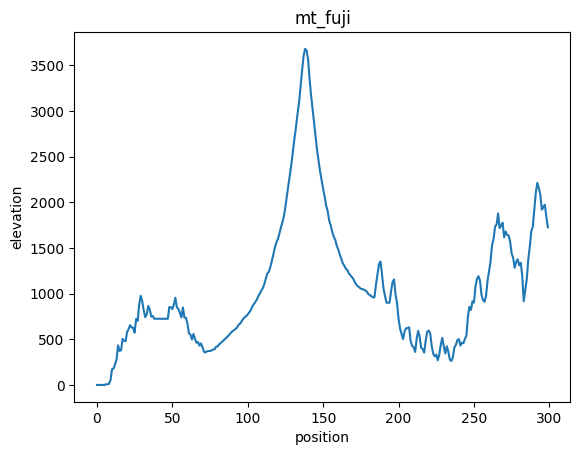

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("position")
plt.ylabel("elevation")
plt.title("mt_fuji")
plt.plot(fuji[:,0], fuji[:,3],)
plt.show()

# PROBLEM 2 Calculating the slope of a point

In [ ]:
def gradient(x, data):
    if x <= 1:
        return 0  # Assuming the gradient at the first point is 0
    else:
        change_in_elevation = data[x - 1, 3] - data[x - 2, 3]
        change_in_position = 1  # Assuming the change in position is always 1
        return change_in_elevation / change_in_position

# Test the function
print(gradient(136, fuji))


178.42999999999984


In [ ]:
def gradient(x):
    return (fuji[x,3] - fuji[x-1,3]) / (x-(x-1))
gradient(136)

168.35000000000036

# PROBLEM 3 Calculating the destination

In [ ]:
def gradient(position):
    if position == 1:
        return 0  # There's no previous point, so gradient is 0
    else:
        change_in_elevation = fuji[position - 1, 3] - fuji[position - 2, 3]
        return change_in_elevation / 1  # Change in position is always 1

def compute_next_position(position, elevation, alpha=0.1):
    next_position = position - alpha * gradient(position)
    next_position = np.maximum(1, next_position)
    next_position = np.minimum(len(elevation) - 1, next_position)
    next_position_int = np.round(next_position).astype(int)
    return next_position_int

fuji = np.loadtxt("/content/drive/MyDrive/mtfuji_data.csv", delimiter=",", skiprows=1)

position = 136
fuji_elevation = fuji[:, 3]
next_position = compute_next_position(position, fuji_elevation, alpha=0.1)
print(position, next_position)

# Function to calculate gradient descent
def gradient_descent(position, elevations):
    return elevations[position] - elevations[position - 1]

position = 136
fuji_elevations = fuji[:, 3]
print(position, gradient_descent(position, fuji_elevations))

# Handling array of positions
positions = np.array([135, 136, 137])
next_positions = [compute_next_position(pos, fuji_elevation, alpha=0.1) for pos in positions]
print(positions, next_positions)



136 118
136 168.35000000000036
[135 136 137] [123, 118, 120]


In [ ]:
def compute_next_position(position, elevation, alpha=0.1):
    next_position = position - alpha*gradient(position)
    next_position = np.maximum(1, next_position)
    next_position = np.minimum(len(elevation)-1, next_position)
    next_position_int = np.round(next_position).astype(int)
    return next_position_int

position = 136
fuji_elevations = fuji[:, 3]

next_position = compute_next_position(position, fuji_elevations, alpha=0.1)
print(position, next_position)

136 119


# PROBLEM 4 Going down the mountain

In [ ]:
def descend_mount(start_position, elevations, alpha=0.1):
    position = [start_position]
    while position[-1] not in position[:-1]:
        position.append(compute_next_position(position[-1], elevations, alpha = alpha))
    return position[:-1]

start_position = 136
fuji_elevations = fuji[:, 3]
descended_list = descend_mount(start_position, fuji_elevations, alpha = 0.1)
print(descended_list)

[136, 118, 111, 108, 104, 100, 99, 97, 94, 92, 91, 90, 88, 86, 84, 83, 81]


# PROBLEM 5 Descent Process Visualization

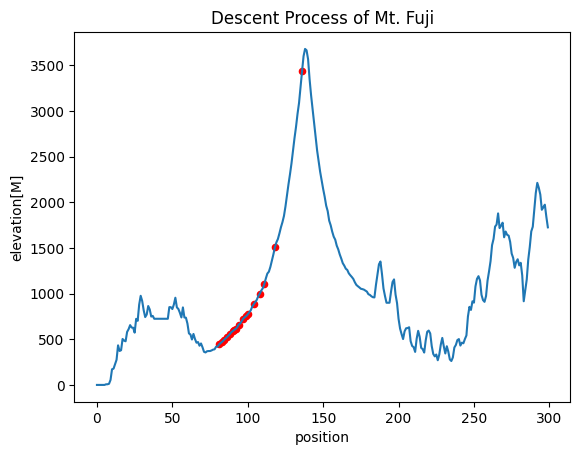

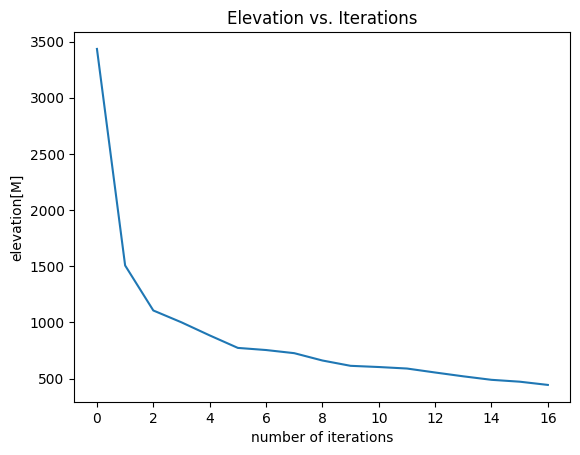

In [ ]:
import matplotlib.pyplot as plt

fuji_elevations = fuji[:, 3]
descended_elevation = fuji_elevations[descended_list]

plt.xlabel("position")
plt.ylabel("elevation[M]")
plt.title("Descent Process of Mt. Fuji")
plt.plot(fuji_elevations)
plt.scatter(descended_list, descended_elevation, s=20, color="red")  # Set marker size with 's'
plt.show()

num_iterations = len(descended_list)
plt.xlabel("number of iterations")
plt.ylabel("elevation[M]")
plt.title("Elevation vs. Iterations")
plt.plot(range(num_iterations), descended_elevation)
plt.show()


# PROBLEM 6 Changing initial value

In [ ]:
initial_positions = range(1, 300)  # Generate initial positions for all other points
descended_lists = []  # Initialize an empty list to store descent processes for each initial position

for start_position in initial_positions:
    descended_lists.append(descend_mount(start_position, fuji[:, 3], alpha=0.2))

print(len(descended_lists))

299


In [ ]:
descended_list = []
for i, start_position in enumerate(range(1, 300)):
    descended_list.append(descend_mount(start_position, fuji[:, 3], alpha=0.2))
    print(len(descended_list))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


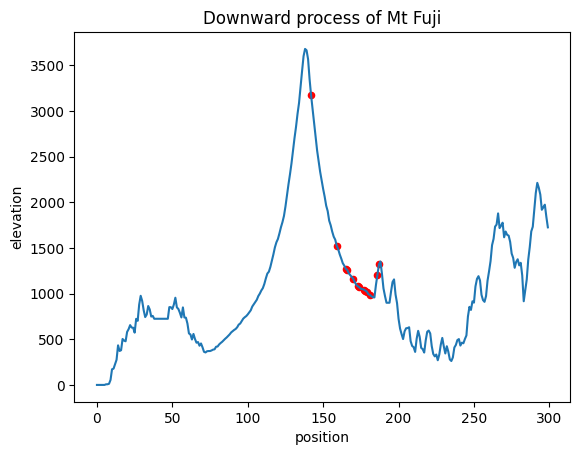

In [ ]:
plt.xlabel("position")
plt.ylabel("elevation")
plt.title("Downward process of Mt Fuji")
plt.plot(fuji[:, 3])
plt.scatter(descended_list[141],fuji[:, 3][descended_list[141]], 20, color="red")
plt.show()

# PROBLEM 7 Change Hyperparameters

In [ ]:
import numpy as np

start_position = 136
alphas = np.array([0.005, 0.01, 0.05, 0.1, 0.5, 1])
descended_list_alphas = []

for alpha in alphas:
    descended_list_alphas.append(descend_mount(start_position, fuji[:, 3], alpha=alpha))

print(len(descended_list_alphas))


6


# PROBLEM 8

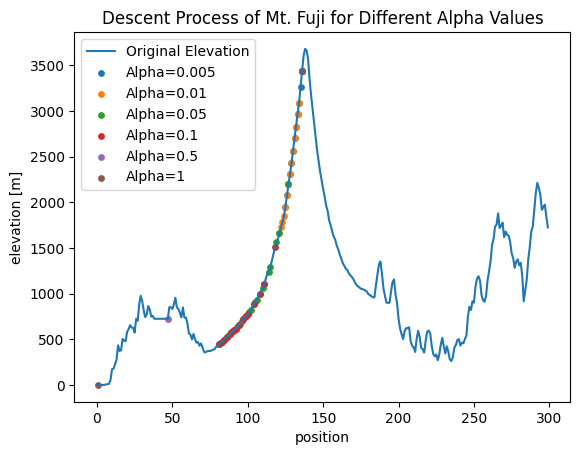

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_descent_process(start_position, alphas):
    descended_lists = []
    for alpha in alphas:
        descended_lists.append(descend_mount(start_position, fuji[:, 3], alpha=alpha))

    fuji_elevations = fuji[:, 3]
    plt.xlabel("position")
    plt.ylabel("elevation [m]")
    plt.title("Descent Process of Mt. Fuji for Different Alpha Values")
    plt.plot(fuji_elevations, label="Original Elevation")

    for alpha, descended_list in zip(alphas, descended_lists):
        descended_elevation = fuji_elevations[descended_list]
        plt.scatter(descended_list, descended_elevation, s=15, label=f"Alpha={alpha}")

    plt.legend()
    plt.show()

start_position = 136
alphas = [0.005, 0.01, 0.05, 0.1, 0.5, 1]
visualize_descent_process(start_position, alphas)
